# Exploratory Data Analysis of Games from 1970 to 2016

This dataset contains the data of games released from 1970 to 2016, we can obtain the following things from this dataset of a game:
1. the **Release Date** of the game
2. the **Genre** of the game
3. which **Platform** the game supports
4. the **Score** of the game
5. the **Title(Name)** of the game

From the data we have above, this Exploratory Data Analysis is trying to answer the questions below:
1. When is the best time to release a game?
2. Which platforms are popular?
3. Which kinds of genre are popular?
4. What are the main topics of the popular games?
5. Others

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import wordcloud 
import scipy.misc
warnings.filterwarnings('ignore')
%matplotlib inline

# Import Data

In [2]:
path = os.getcwd()
data = pd.read_csv(path + '/Data/ign.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18625 non-null int64
score_phrase      18625 non-null object
title             18625 non-null object
url               18625 non-null object
platform          18625 non-null object
score             18625 non-null float64
genre             18589 non-null object
editors_choice    18625 non-null object
release_year      18625 non-null int64
release_month     18625 non-null int64
release_day       18625 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


We can see that there are NAs in __genre__ column, so the next step is to remove them

In [4]:
data_c = data.dropna()

In [5]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18589 entries, 0 to 18624
Data columns (total 11 columns):
Unnamed: 0        18589 non-null int64
score_phrase      18589 non-null object
title             18589 non-null object
url               18589 non-null object
platform          18589 non-null object
score             18589 non-null float64
genre             18589 non-null object
editors_choice    18589 non-null object
release_year      18589 non-null int64
release_month     18589 non-null int64
release_day       18589 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.7+ MB


In [6]:
data_c.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [7]:
data_c.describe()

,Unnamed: 0,score,release_year,release_month,release_day
count,18589.000000,18589.000000,18589.000000,18589.000000,18589.000000
mean,9306.310183,6.950853,2006.508634,7.139868,15.601431
std,5376.141895,1.712078,4.588687,3.477048,8.692460
min,0.000000,0.500000,1970.000000,1.000000,1.000000
25%,4651.000000,6.000000,2003.000000,4.000000,8.000000
50%,9298.000000,7.300000,2007.000000,8.000000,16.000000
75%,13959.000000,8.200000,2010.000000,10.000000,23.000000
max,18624.000000,10.000000,2016.000000,12.000000,31.000000


# Question 1: When is the best time to release a game?

To answer this question, let's first look at the distrbution of the release year

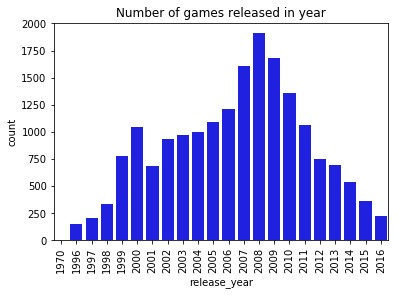

In [8]:
sns.countplot(data_c['release_year'],
             color = 'blue')
plt.title('Number of games released in year')
plt.xticks(rotation = 90);

Here we can see that the data points in 1970 are outliers, therefore we should remove them from our analysis

In [9]:
data_cc = data_c[data_c['release_year'] > 1970]

In [10]:
data_cc.describe()

,Unnamed: 0,score,release_year,release_month,release_day
count,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000
mean,9306.783086,6.950769,2006.510598,7.140198,15.602216
std,5375.899857,1.712087,4.580990,3.476850,8.692034
min,0.000000,0.500000,1996.000000,1.000000,1.000000
25%,4651.750000,6.000000,2003.000000,4.000000,8.000000
50%,9298.500000,7.300000,2007.000000,8.000000,16.000000
75%,13959.250000,8.200000,2010.000000,10.000000,23.000000
max,18624.000000,10.000000,2016.000000,12.000000,31.000000


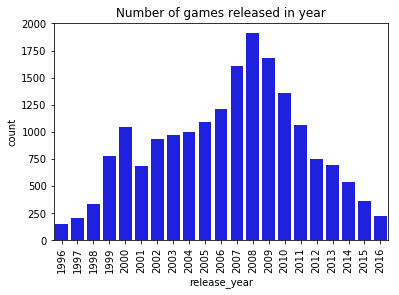

In [11]:
sns.countplot(data_cc['release_year'],
             color = 'blue')
plt.title('Number of games released in year')
plt.xticks(rotation = 90);

Without having the outliers, we can see that the number of games released are increasing from 1996 and reaches the top in the year of 2008, then followed by a decreasing till 2016

Then, let's look at the distrbution of the release month

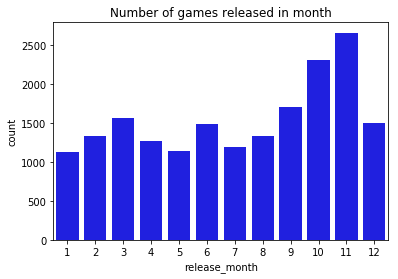

In [12]:
sns.countplot(data_cc['release_month'],
             color = 'blue')
plt.title('Number of games released in month');

Here we can see that game makers prefer release their games at the end of the year, then what about the weekdays?

In [13]:
data_cc['Date'] = pd.to_datetime(data_cc['release_year'].astype(str) + '-' + data_cc['release_month'].astype(str) + '-' + data_cc['release_day'].astype(str))

In [14]:
data_cc['Weekday'] = data_cc['Date'].dt.weekday_name

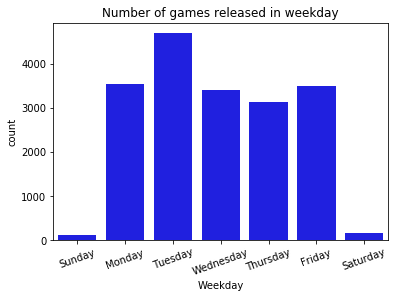

In [15]:
sns.countplot(data_cc['Weekday'],
             color = 'blue',
             order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

plt.title('Number of games released in weekday')
plt.xticks(rotation = 20);

It is interesting to see that game makers prefer release their games during the workdays

__Brief Summary__:  
The year of 2008 has the most of the games released and game makers like releasing their game at the end of the year and during the workdays

We have seen the relationship between the number of games released and the time, how about the relationship between the feedbacks(score) and the time?  
First, let's look at how scores distribute

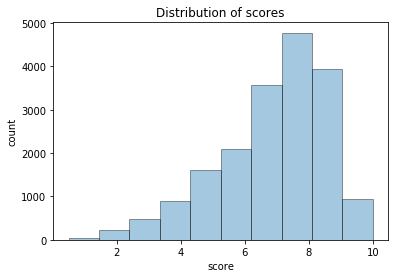

In [16]:
sns.distplot(data_cc['score'],
             kde=False,
             bins = 10,
             hist_kws=dict(edgecolor="k"))
plt.ylabel('count')
plt.title('Distribution of scores');

We can see that the distribution of scores is left skewed and the most of the scores are gathering around 8. Then let's find out is there any good time for game makers to release their game to gain a high score.

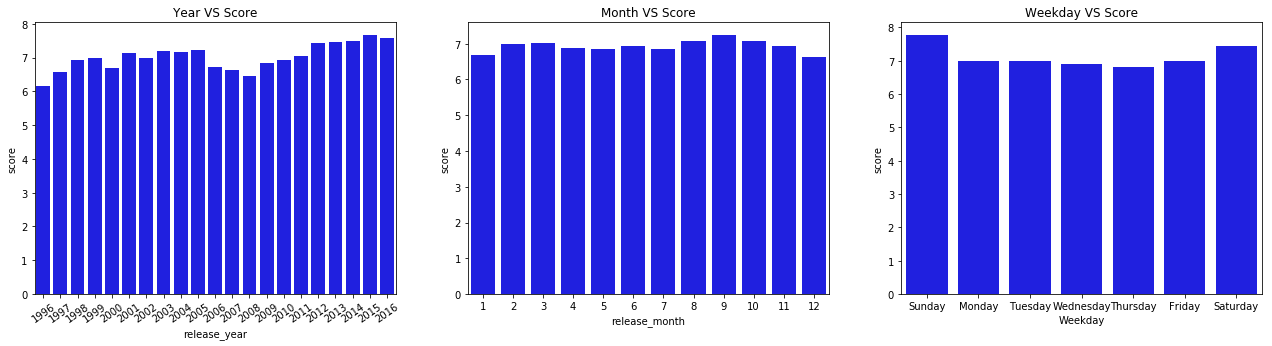

In [17]:
year_score = pd.DataFrame(data_cc.groupby('release_year')['score'].mean()).reset_index()
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.barplot(x = 'release_year',
            y = 'score',
            data = year_score,
            color = 'blue')
plt.xticks(rotation = 35)
plt.title('Year VS Score')
plt.subplot(1,3,2)
month_score = pd.DataFrame(data_cc.groupby('release_month')['score'].mean()).reset_index()
sns.barplot(x = 'release_month',
            y = 'score',
            data = month_score,
            color = 'blue')
plt.title('Month VS Score')
plt.subplot(1,3,3)
wday_score = pd.DataFrame(data_cc.groupby('Weekday')['score'].mean()).reset_index()
sns.barplot(x = 'Weekday',
            y = 'score',
            data = wday_score,
            color = 'blue',
           order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('Weekday VS Score');

There are not huge differences in terms of score in difference time peroid. So maybe the release time is not a main effect that influences the score of a game. But games released in September or on Sunday have a reletively high score.

# Question 2: Which platforms are popular?

For this part, I am going to do the analysis from two aspects: from the view of __game makers__ and from the view of __players__

## For game makers

If a platform has lots of game released on it, then I consider it as a popular platform for game makers.

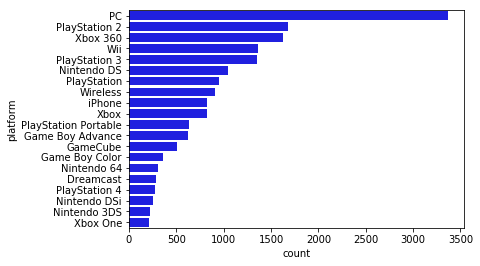

In [18]:
platform_makers = pd.DataFrame(data_cc.groupby('platform')['title'].count()).sort_values(by = 'title', ascending=False).head(20).reset_index()
platform_makers = platform_makers.rename(columns={'title':'count'})
sns.barplot(y = 'platform',
            x = 'count',
            data = platform_makers,
            color = 'blue');

In [19]:
platform_makers['percentage'] = (round(platform_makers['count'] * 100 / 18589.0, 2)).astype(str) + '%'
platform_makers

,platform,count,percentage
0,PC,3367,18.11%
1,PlayStation 2,1684,9.06%
2,Xbox 360,1630,8.77%
3,Wii,1362,7.33%
4,PlayStation 3,1355,7.29%
5,Nintendo DS,1044,5.62%
6,PlayStation,952,5.12%
7,Wireless,906,4.87%
8,iPhone,828,4.45%
9,Xbox,821,4.42%


By plotting the top 20 popular platform for game makers, we can see that PC is the most popular platform, 18.11% of the games released from 1970 to 2016 support the PC platform. 

## For players

An important indicator to find which games are popular among the players is the score rated by the players, if a certain platform has lots of high rated games released on it, then I consider it as a popular platform for players.

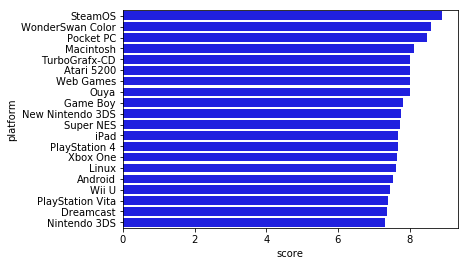

In [20]:
platform_players = pd.DataFrame(data_cc.groupby('platform')['score'].mean()).sort_values(by = 'score', ascending=False).head(20).reset_index()
sns.barplot(y = 'platform',
            x = 'score',
            data = platform_players,
            color = 'blue');

Here we can see that for players, the case is different, SteamOS is the platform that has high score games, while we cannot see PC in the TOP 20 for players. But at the same time, there are not so many games released on the platform of SteamOS as we can see from the game makers side.

# Question 3: Which kinds of genre are popular?

Similarly, I am also going to seperate this question into two parts: __game makers'__ side and __players'__ side

## For game makers

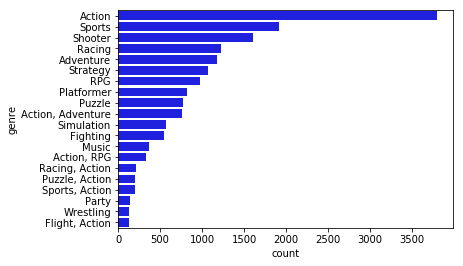

In [21]:
platform_makers = pd.DataFrame(data_cc.groupby('genre')['title'].count()).sort_values(by = 'title', ascending=False).head(20).reset_index()
platform_makers = platform_makers.rename(columns={'title':'count'})
sns.barplot(y = 'genre',
            x = 'count',
            data = platform_makers,
            color = 'blue');

In [22]:
platform_makers['percentage'] = (round(platform_makers['count'] * 100 / 18589.0, 2)).astype(str) + '%'
platform_makers

,genre,count,percentage
0,Action,3797,20.43%
1,Sports,1916,10.31%
2,Shooter,1610,8.66%
3,Racing,1228,6.61%
4,Adventure,1174,6.32%
5,Strategy,1071,5.76%
6,RPG,980,5.27%
7,Platformer,823,4.43%
8,Puzzle,776,4.17%
9,"Action, Adventure",765,4.12%


Action game is the most popular game for the game makers, 20% of the games are action game, almost more than twice as many as the second one. 50% of the games made during 1970 to 2016 are Action, Sports, Shooter, Racing and Adventure games.

## For players

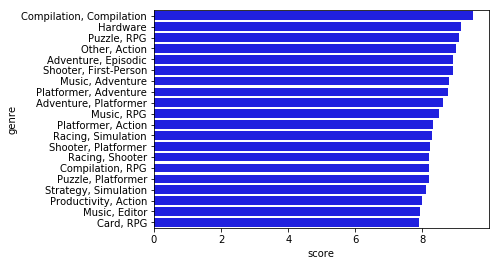

In [23]:
platform_makers = pd.DataFrame(data_cc.groupby('genre')['score'].mean()).sort_values(by = 'score', ascending=False).head(20).reset_index()
sns.barplot(y = 'genre',
            x = 'score',
            data = platform_makers,
            color = 'blue');

Compilation has the highest score among all the game genres (this may because the game makers only choose the popular games together to make the compilation)

# Question4: What are the titles of the popular games?

Here we select TOP 50% games for players to analyze.

In [24]:
top_score = data_cc.sort_values(by = 'score', ascending = False).head(int(data_cc.shape[0]/2))

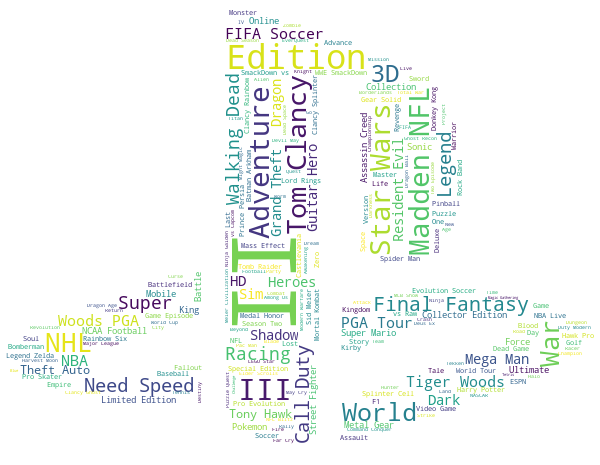

In [25]:
long_string = ' '.join(top_score['title'].tolist())
im = scipy.misc.imread(path + '/Data/PS copy.jpg')
wordclouds = wordcloud.WordCloud(stopwords=wordcloud.STOPWORDS, 
                                 mask = im, 
                                 background_color='white',
                                 scale = .5)
wordclouds.generate(long_string)
wordclouds.to_image()

Above is the wordcloud about the TOP 50% popular games' titles, here we can see __Call Duyt__, __Final Fantasy__ and __Tom Clancy__ etc. 

# Question 5: Others

In this section, I am going to comine the variables above, trying to find is there any other interesting things that cannnot be found by only analyzing one variable.

## Year/Month and Genre

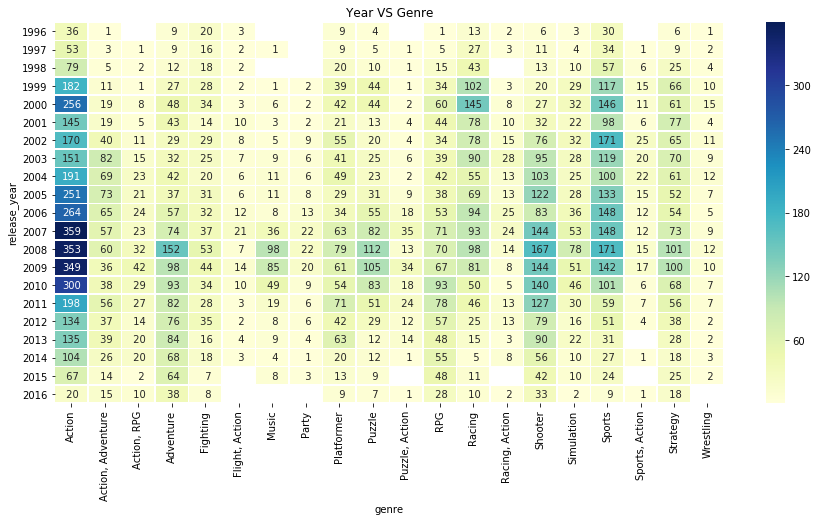

In [84]:
genres_count = pd.DataFrame(data_cc.groupby(by = 'genre')['title'].count()).sort_values(by = 'title', ascending = False)[:20].reset_index()
top_genres = data_cc[data_cc['genre'].isin(genres_count['genre'])]
year_genre = top_genres.groupby(['release_year', 'genre'])['title'].count().reset_index().sort_values(by = 'title')
year_genre = pd.pivot_table(year_genre,
                            values = 'title', 
                            index = 'release_year', 
                            columns = 'genre')
plt.figure(figsize=(15,7))
sns.heatmap(data = year_genre, 
            annot=True, 
            fmt='3.0f', 
            cmap="YlGnBu", linewidth = .5)
plt.title('Year VS Genre');

Here we can see that most of the games reach their top released number in the year of 2008, but __Racing, Action__ game reached its top in 2000.

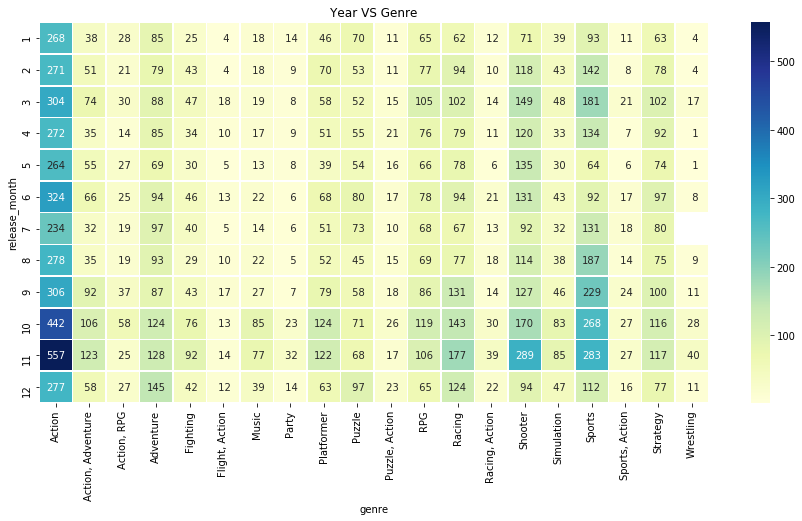

In [85]:
year_genre = top_genres.groupby(['release_month', 'genre'])['title'].count().reset_index().sort_values(by = 'title')
year_genre = pd.pivot_table(year_genre,
                            values = 'title', 
                            index = 'release_month', 
                            columns = 'genre')
plt.figure(figsize=(15,7))
sns.heatmap(data = year_genre, 
            annot=True, 
            fmt='3.0f', 
            cmap="YlGnBu", linewidth = .5)
plt.title('Year VS Genre');

For month, there is no significant differnece from the analysis before, most of the games are released at the end of the year.

## Year VS Platform

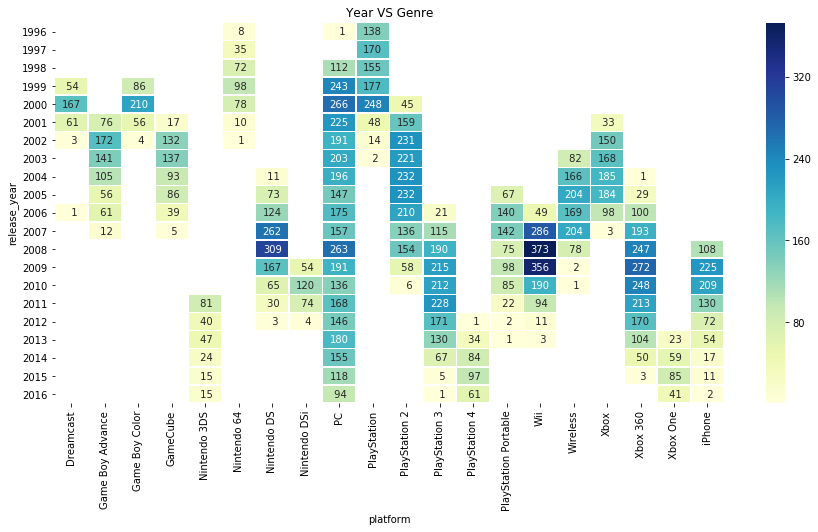

In [88]:
genres_count = pd.DataFrame(data_cc.groupby(by = 'platform')['title'].count()).sort_values(by = 'title', ascending = False).reset_index()[:20]
top_genres = data_cc[data_cc['platform'].isin(genres_count['platform'])]
year_genre = top_genres.groupby(['release_year', 'platform'])['title'].count().reset_index().sort_values(by = 'title')
year_genre = pd.pivot_table(year_genre,
                            values = 'title', 
                            index = 'release_year', 
                            columns = 'platform')
plt.figure(figsize=(15,7))
sns.heatmap(data = year_genre, 
            annot=True, 
            fmt='3.0f', 
            cmap="YlGnBu", linewidth = .5)
plt.title('Year VS Genre');

It is not suprise to see that there are lots of blanks in the heatmap above, because some platforms only appear recently and some of them disapperaed as time flies by. So here we can see that PC platform has last a really long time but the number of games released on it is decreasing after 2008, and such number on PlayStation Series folllows the same pattern, where the number of games released on it is small at the beginning and the ending of its product life cycle and reachs its top at the middle, the form of the distribution is like a bell. So we can predict that there will be more games releasedon PS4 after 2016. And this is also the case happens on Xbox Series.